In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
medical_df = pd.read_csv('insurance.csv')
print(medical_df.isna().sum())
print(medical_df.shape)
print(medical_df.columns)
medical_df.head(5)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Questions:
* What Region Pays the Most
* Do Older People Pay More
* Do People with Higher BMI Pay More
* Whats the Highest Charge that someone received (RIP)

C:\Users\commo\AppData\Local\Temp\ipykernel_27568\3915081979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medical_df.corr(), annot=True)


<AxesSubplot: >

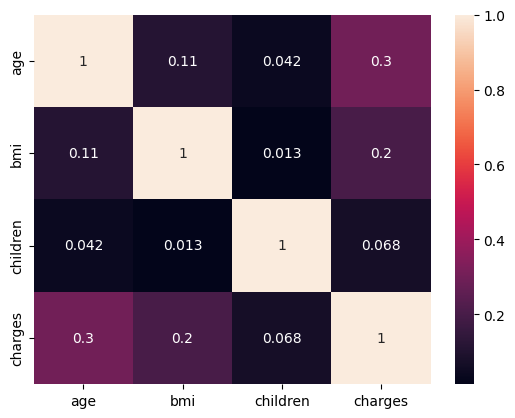

In [3]:
sns.heatmap(medical_df.corr(), annot=True)

Older People Have to Pay More?
<br>
<br>Reasons</br>
* Greater Health Issues
* More Risk for Damaging Issues
* Cancer

<br>
What happens if they are split by quantiles of age?

In [4]:
# Split by Custom Ranges of Values 
ages_deciles_df = medical_df.copy()
ages_deciles_df['age_deciles'] = pd.cut(ages_deciles_df['age'], [0, 18, 30, 40, 50, 60, 70, 80, 90, 100])

In [5]:
ages_deciles_df['age_deciles'].value_counts()

(18, 30]     375
(40, 50]     281
(50, 60]     265
(30, 40]     257
(60, 70]      91
(0, 18]       69
(70, 80]       0
(80, 90]       0
(90, 100]      0
Name: age_deciles, dtype: int64

In [6]:
# Correlations for Each of the Age Deciles
for age_decile in ages_deciles_df['age_deciles'].unique():
    print('Correlation for age decile {}:'.format(age_decile))
    print(ages_deciles_df[ages_deciles_df['age_deciles'] == age_decile].corr())
    print('\n')

Correlation for age decile (18, 30]:
               age       bmi  children   charges
age       1.000000  0.034685  0.250411  0.049006
bmi       0.034685  1.000000 -0.008507  0.248832
children  0.250411 -0.008507  1.000000  0.090336
charges   0.049006  0.248832  0.090336  1.000000


Correlation for age decile (0, 18]:
          age       bmi  children   charges
age       NaN       NaN       NaN       NaN
bmi       NaN  1.000000 -0.163592  0.070476
children  NaN -0.163592  1.000000  0.065605
charges   NaN  0.070476  0.065605  1.000000


Correlation for age decile (30, 40]:
               age       bmi  children   charges
age       1.000000 -0.054843  0.118568  0.047525
bmi      -0.054843  1.000000  0.012639  0.164862
children  0.118568  0.012639  1.000000  0.022102
charges   0.047525  0.164862  0.022102  1.000000


Correlation for age decile (40, 50]:
               age       bmi  children   charges
age       1.000000  0.019721  0.023227  0.048725
bmi       0.019721  1.000000 -0.000537 

C:\Users\commo\AppData\Local\Temp\ipykernel_27568\758461456.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(ages_deciles_df[ages_deciles_df['age_deciles'] == age_decile].corr())
C:\Users\commo\AppData\Local\Temp\ipykernel_27568\758461456.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(ages_deciles_df[ages_deciles_df['age_deciles'] == age_decile].corr())
C:\Users\commo\AppData\Local\Temp\ipykernel_27568\758461456.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warn

Text(0.5, 1.0, 'Cost of Care by Age')

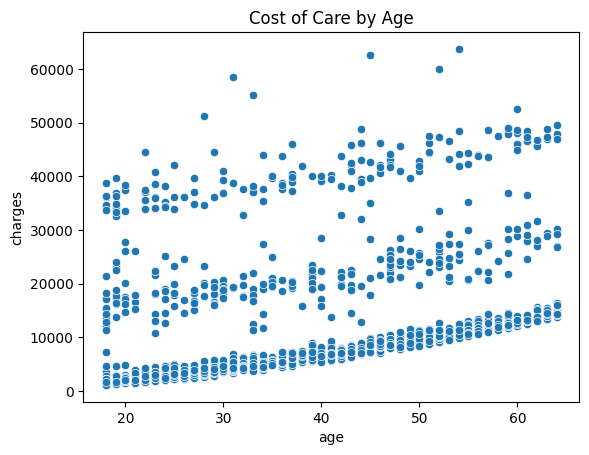

In [7]:
sns.scatterplot(x='age', y='charges', data=medical_df)
plt.title('Cost of Care by Age')

Lets Look at Region Costs Now

In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
medical_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

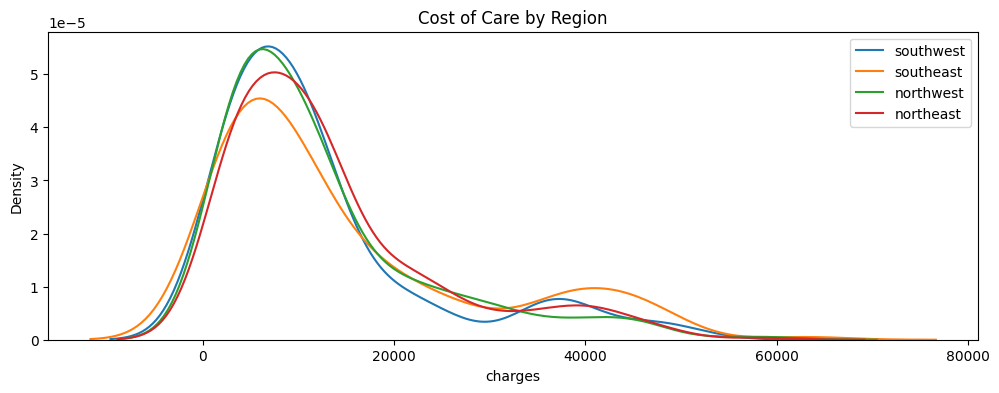

In [10]:
fig = plt.figure(figsize=(12, 4))

for region in medical_df['region'].unique():
    sns.kdeplot(medical_df[medical_df['region'] == region]['charges'], label=region)

plt.title('Cost of Care by Region')
plt.legend()

What does the UMAP look like?
<br>
From the age & charge plot their seems to be a consistent 3 mode distribution in charges depending on the severity 

In [11]:
import umap

In [12]:
embedding = umap.UMAP(random_state=42).fit_transform(medical_df[['age', 'bmi', 'children', 'charges']])



Text(0.5, 1.0, 'UMAP Projection of Medical Costs Patients')

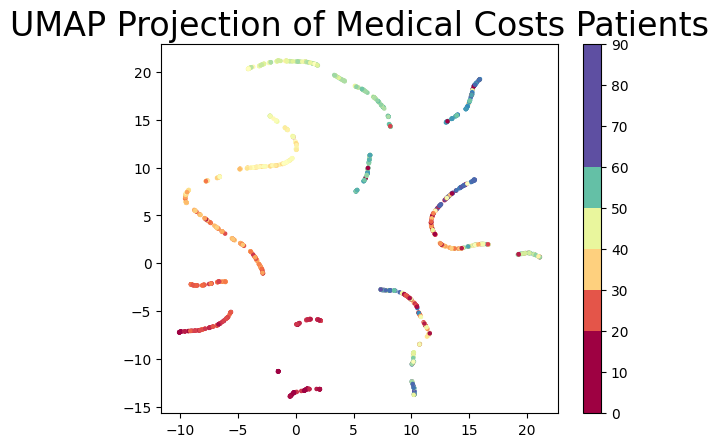

In [13]:
import numpy as np
# Plot UMAP
plt.scatter(embedding[:, 0], embedding[:, 1], c=medical_df['age'], s=5, cmap='Spectral')

# Add Colorbar
cbar = plt.colorbar(boundaries=np.arange(0, 100, 10))

plt.title('UMAP Projection of Medical Costs Patients', fontsize=24)

there seems to be 2 distinct clusters separate from the charges incurred by age which matches with the idea of the 3 tiered medical events that can occur to any patient, but still having the general trend for age
<br>
<br>
the other clusterd are hypothesized to contain the patients who have high BMI

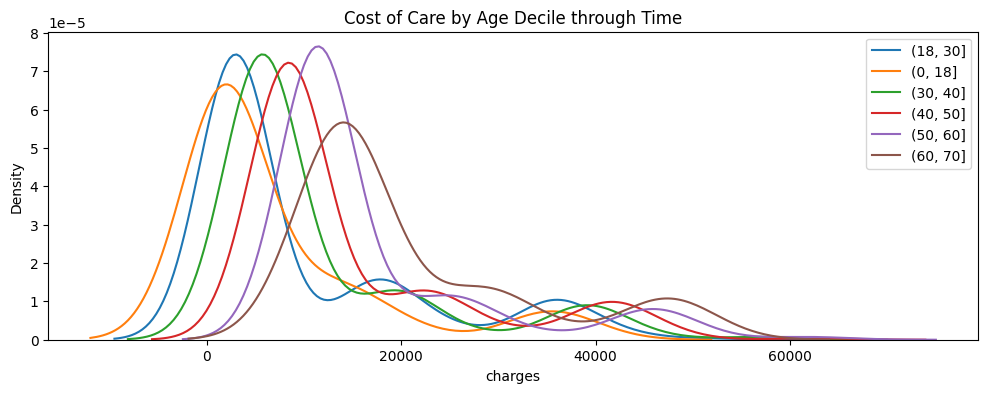

In [14]:
# Histogram
plt.figure(figsize=(12, 4))
# Correlations for Each of the Age Deciles
for age_decile in ages_deciles_df['age_deciles'].unique():
    sns.kdeplot(ages_deciles_df[ages_deciles_df['age_deciles'] == age_decile]['charges'], label=age_decile)
    
plt.title('Cost of Care by Age Decile through Time')
plt.legend()

it is interesting seeings the arrow going forward in time which was also seen in the scatter plot

In [18]:
medical_df[medical_df['smoker'] == 'yes'].describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [19]:
medical_df[medical_df['smoker'] == 'no'].describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [22]:
men_df = medical_df[medical_df['sex'] == 'male']
print(men_df.shape)

(676, 7)


In [23]:
women_df = medical_df[medical_df['sex'] == 'female']
print(women_df.shape)

(662, 7)


<AxesSubplot: xlabel='age', ylabel='charges'>

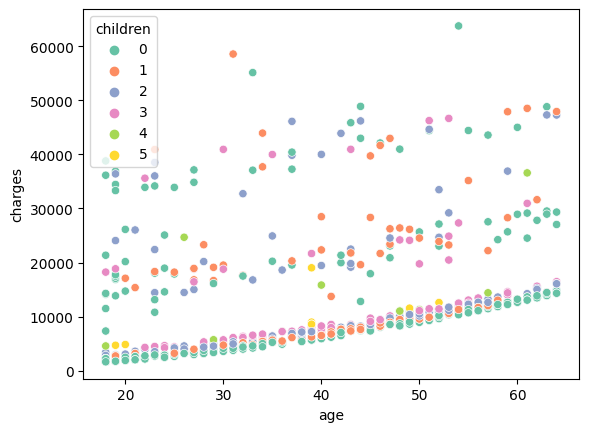

In [36]:
sns.scatterplot(data = women_df, x = 'age', y = 'charges', hue = 'children', palette = 'Set2')

{'whiskers': [<matplotlib.lines.Line2D at 0x181372890f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1813725de10>,
 'boxes': [<matplotlib.lines.Line2D at 0x18137288e50>],
 'medians': [<matplotlib.lines.Line2D at 0x18137289540>],
 'fliers': [<matplotlib.lines.Line2D at 0x181372897e0>],
 'means': []}

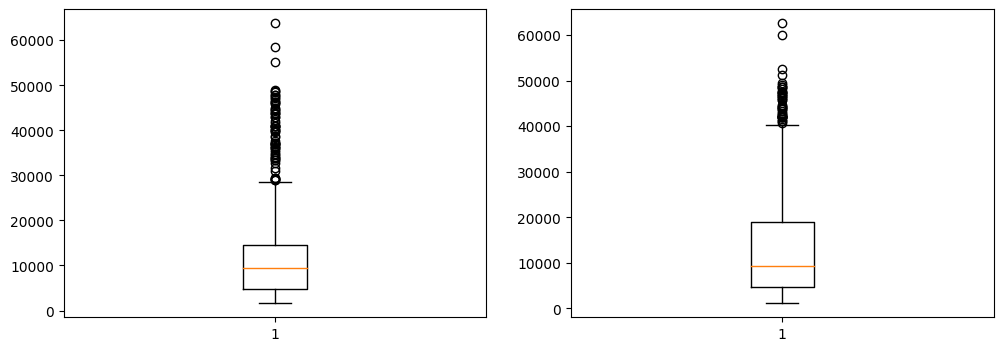

In [28]:
# barplot of male and women cost
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].boxplot(women_df['charges'])
ax[1].boxplot(men_df['charges'])



<AxesSubplot: xlabel='bmi', ylabel='charges'>

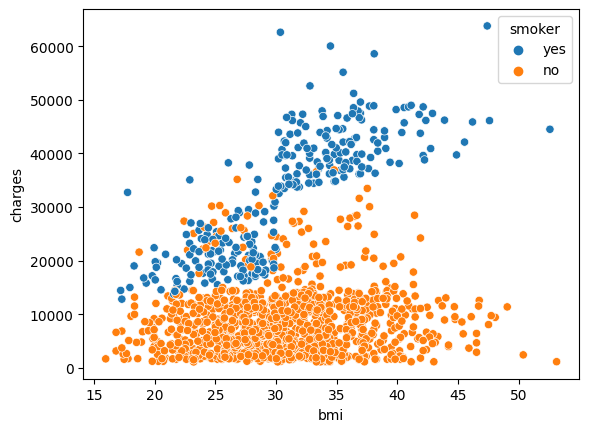

In [16]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=medical_df)